In [105]:
import pandas as pd
import numpy as np


In [106]:
books=pd.read_csv('Books.csv')
users=pd.read_csv('users.csv')
ratings=pd.read_csv('Ratings.csv')

C:\Users\joshi\AppData\Local\Temp\ipykernel_22884\1097396059.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [107]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [108]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [109]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [110]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [111]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [112]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [113]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [114]:
users.duplicated().sum()

0

In [115]:
ratings.duplicated().sum()

0

In [116]:
books.duplicated().sum()

0

In [117]:
# we don't have any duplicated values

In [118]:
users['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0          NaN
1         18.0
2          NaN
3         17.0
4          NaN
          ... 
278853     NaN
278854    50.0
278855     NaN
278856     NaN
278857     NaN
Name: Age, Length: 278858, dtype: float64>

In [119]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

There are outliers in our data, the age is 244 is not possible, and the 0 is not possible.

We wanted to build a general model so we remove those outliers and fill the nan values with mean.

In [120]:
age_mean=users['Age'].mean()
age_std=users['Age'].std()

In [121]:
lower_bound=age_mean-3*age_std
high_bound=age_mean+3*age_std
print(lower_bound)
print(high_bound)

-8.53285844281659
78.03572585191615


In [122]:
users=users[(users['Age']>lower_bound) & (users['Age']<high_bound)]

In [123]:
users.describe()

,User-ID,Age
count,167400.000000,167400.000000
mean,139388.727700,34.470723
std,80559.099944,13.651683
min,2.000000,0.000000
25%,69912.500000,24.000000
50%,139348.000000,32.000000
75%,209159.250000,44.000000
max,278855.000000,78.000000


In [124]:
def remove_age_less_than_7(df):
    age=df['Age']>=7
    return df[age]
#Remove age that are less than 7 using the function
users=remove_age_less_than_7(users)
users

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


In [125]:
users.describe()

,User-ID,Age
count,166474.000000,166474.000000
mean,139380.740302,34.656559
std,80550.523352,13.459235
min,2.000000,7.000000
25%,69903.250000,24.000000
50%,139324.500000,32.000000
75%,209138.750000,44.000000
max,278855.000000,78.000000


now we are going to merging the dataframes into one to perfrom our task

In [126]:
data=users.merge(ratings,on='User-ID')


In [127]:
data.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,10,"albacete, wisconsin, spain",26.0,1841721522,0
2,10,"albacete, wisconsin, spain",26.0,8477024456,6
3,19,"weston, ,",14.0,0375759778,7
4,20,"langhorne, pennsylvania, usa",19.0,0425163091,0


In [128]:
#first we are going to drop the location column because it doesn't add any value to our book recommendation

In [129]:
data.drop('Location',axis='columns')

,User-ID,Age,ISBN,Book-Rating
0,2,18.0,0195153448,0
1,10,26.0,1841721522,0
2,10,26.0,8477024456,6
3,19,14.0,0375759778,7
4,20,19.0,0425163091,0
...,...,...,...,...
832255,278851,33.0,1558531025,8
832256,278851,33.0,1566910102,0
832257,278851,33.0,1569661057,10
832258,278851,33.0,1885071213,7


In [130]:
#now we are going to merge books the dataframe based on the ISBN to the books dataframe
books=books.merge(data,on='ISBN')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,"toronto, ontario, canada",30.0,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,"victoria, british columbia, canada",36.0,0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,"ottawa, ontario, canada",29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
747235,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,"providence, rhode island, usa",26.0,7
747236,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,"orem, utah, usa",12.0,4
747237,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,"hopewell junction, new york, usa",55.0,0
747238,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,"hopewell junction, new york, usa",55.0,0


In [131]:
books.shape

(747240, 12)

In [132]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            2
User-ID                0
Location               0
Age                    0
Book-Rating            0
dtype: int64

In [133]:
books.duplicated().sum()

0

In [134]:
books.dropna(subset=['Publisher','Image-URL-L','Book-Author'],inplace=True)
# By setting subset to these specific columns, the dropna() method only drops rows where the specified columns have missing values. If a row has a missing value in any other column, it will not be affected by this method.

In [135]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Location               0
Age                    0
Book-Rating            0
dtype: int64

In [136]:
#Now we have cleaned data

Exploratory Data Analysis (EDA)

In [137]:
# importing necessary libraries for EncodingWarning
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
Age=books['Age']
books_Rating=books['Book-Rating']
books_title=books['Book-Title']
publisher=books['Publisher']


Text(0, 0.5, 'Ratings')

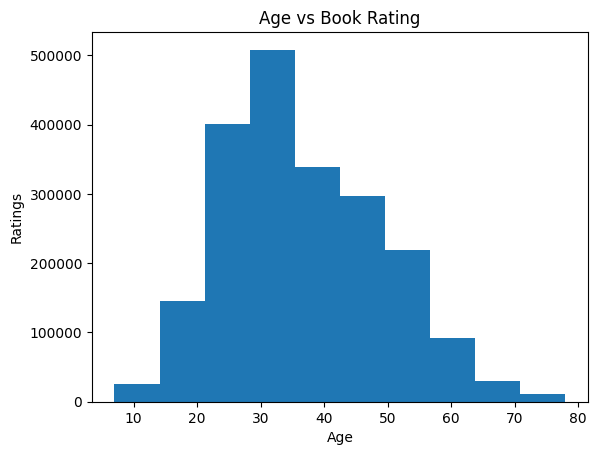

In [139]:
plt.hist(x=Age,weights=books_Rating,bins=10,align='mid')
plt.title('Age vs Book Rating')
plt.xlabel('Age')
plt.ylabel('Ratings')

In [140]:
#now i want to find the top 5 publishers with high ratings
avg_ratings=books.groupby('Publisher')['Book-Rating'].mean().sort_values(ascending=False)[:5]
# avg_ratings
for i,publisher in enumerate(avg_ratings.index,start=1):
    print(f'{i}.{publisher}:{avg_ratings[publisher]:.2f}')

1. Editions P. Terrail:10.00
2.Unicorn Pub. House:10.00
3.Ulmer (Eugen):10.00
4.Ediciones Zarebska:10.00
5.Ediciones Torremozas:10.00


In [141]:
#Now i want to find the top 5 ratings books
books_Rating=books.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)[:5]
books_Rating

for i,books_title in enumerate(books_Rating.index,start=1):
    print(f'{i}. {books_title}: {books_Rating[books_title]:.2f}')

1. The Mountains of California (Modern Library Classics): 10.00
2. Keane: 10.00
3. Marconi's Atlantic Leap: 10.00
4. One pot meals: 10.00
5. Baubles, Buttons and Beads: The Heritage of Bohemia: 10.00


In [142]:
#Now i want to find top 5 authors having highest rating.
author_rating=books.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False)[:5]
author_rating

for i,book_author in enumerate(author_rating.index,start=1):
    print(f'{i}.{book_author}: {author_rating[book_author]:.2f}')

1.Lee Silber: 10.00
2.Elizabeth Zimmermann: 10.00
3.J. A. MacCulloch: 10.00
4.Elizabeth Watson: 10.00
5.Susan Washburn Buckley: 10.00


Popularity Based Recommender System

In [143]:
num_ratings=books.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_ratings

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Dark Justice,1
...,...,...
204143,Ã?Â?lpiraten.,1
204144,Ã?Â?rger mit Produkt X. Roman.,4
204145,Ã?Â?sterlich leben.,1
204146,Ã?Â?stlich der Berge.,3


In [144]:
num_ratings.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [145]:
avg_num_ratings=books.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_num_ratings.rename(columns={'Book-Rating':'Avg_rating'},inplace=True)

C:\Users\joshi\AppData\Local\Temp\ipykernel_22884\32199080.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_num_ratings=books.groupby('Book-Title').mean()['Book-Rating'].reset_index()


In [146]:
avg_num_ratings

,Book-Title,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,0.000000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Dark Justice,10.000000
...,...,...
204143,Ã?Â?lpiraten.,0.000000
204144,Ã?Â?rger mit Produkt X. Roman.,5.250000
204145,Ã?Â?sterlich leben.,7.000000
204146,Ã?Â?stlich der Berge.,2.666667


In [147]:
popularity_df=num_ratings.merge(avg_num_ratings,on='Book-Title')
popularity_df

,Book-Title,num_ratings,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,0.000000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Dark Justice,1,10.000000
...,...,...,...
204143,Ã?Â?lpiraten.,1,0.000000
204144,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
204145,Ã?Â?sterlich leben.,1,7.000000
204146,Ã?Â?stlich der Berge.,3,2.666667


In [148]:
popularity_df=popularity_df[popularity_df['num_ratings']>=150].sort_values('Avg_rating',ascending=False).head(50)

In [149]:
popularity_df

,Book-Title,num_ratings,Avg_rating
68081,Harry Potter and the Sorcerer's Stone (Book 1),212,6.023585
68063,Harry Potter and the Goblet of Fire (Book 4),291,5.945017
68074,Harry Potter and the Prisoner of Azkaban (Book 3),330,5.936364
68067,Harry Potter and the Order of the Phoenix (Boo...,290,5.724138
51393,Ender's Game (Ender Wiggins Saga (Paperback)),171,5.362573
68056,Harry Potter and the Chamber of Secrets (Book 2),421,5.130641
158738,The Fellowship of the Ring (The Lord of the Ri...,272,5.022059
179137,"The Two Towers (The Lord of the Rings, Part 2)",208,4.865385
186064,To Kill a Mockingbird,367,4.817439
68085,Harry Potter and the Sorcerer's Stone (Harry P...,412,4.810680


In [150]:
popularity_df=popularity_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','Avg_rating']]

In [151]:
popularity_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,Avg_rating
0,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,212,6.023585
212,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,291,5.945017
503,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,330,5.936364
833,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,290,5.724138
1123,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,http://images.amazon.com/images/P/0312853238.0...,171,5.362573
1294,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,421,5.130641
1715,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,272,5.022059
1987,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,208,4.865385
2195,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,367,4.817439
2562,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,412,4.810680


In [152]:
def get_top_books(data,input_book):
    input_rating=data.loc[data['Book-Title']==input_book,'Avg-rating']
    if not input_rating.empty:
        input_rating=input_rating.iloc[0]
    else:
        return[f"sorry,'{input_book}'is not found in the dataset."]

    filtered_books=data[data.groupby('Book-Title')['Avg-rating'].transform('mean')>=input_rating-1] &(data.groupby('Book-Title')['Avg-rating'].transform('mean')<=input_rating +1)

    sorted_books=filtered_books.sort_values(['Avg-rating'],ascending=False)

    recommended_books=sorted_books.head(5)

    books_list=[]
    for i,book in recommended_books.iterrows():
        book_details=f"{book['Book-Title']} by{book['Book-Author']} with an average rating {book['Avg-rating']:.1f}"
        books_list.append(book_details)

    return books_list

In [153]:
# input_book=input("Enter a book title:")
# recommaned_books=get_top_books(popularity_df,input_book)
# print(f"The 5 recommended books based on {input_book} are:")
# for i,book in enumerate(recommaned_books):
#     print(f"{i+1}.{book}")
#     print("-----------")

Collaborative Recommendetion System

In [154]:
books.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
10         1
19         1
20         1
36         1
          ..
278844     2
278846     1
278849     4
278851    23
278852     1
Name: Book-Rating, Length: 53362, dtype: int64

In [155]:
rate_users=books.groupby('User-ID').count()['Book-Rating']>180
good_users=rate_users[rate_users].index
good_users


Int64Index([   254,   2033,   2276,   2766,   2977,   3363,   4017,   4385,
              6251,   6323,
            ...
            274061, 274301, 274308, 274808, 275970, 276680, 277427, 277478,
            277639, 278188],
           dtype='int64', name='User-ID', length=723)

In [156]:
filtered_users=books[books['User-ID'].isin(good_users)]
filtered_users

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,"victoria, british columbia, canada",36.0,0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,"ottawa, ontario, canada",29.0,0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,"ottawa, ontario, canada",29.0,0
12,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,"milpitas, california, usa",36.0,10
13,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,137688,"medford, new york, usa",46.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
747231,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,275970,"pittsburgh, pennsylvania, usa",46.0,0
747232,1845170423,Cocktail Classics,David Biggs,2004,Connaught,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,275970,"pittsburgh, pennsylvania, usa",46.0,7
747237,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,"hopewell junction, new york, usa",55.0,0
747238,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,"hopewell junction, new york, usa",55.0,0


In [157]:
rating_users=filtered_users.groupby('Book-Title').count()['Book-Rating']>=30
top_books=rating_users[rating_users].index # books that have high rating

In [158]:
final_rating=filtered_users[filtered_users['Book-Title'].isin(top_books)]

In [159]:
final_rating.drop_duplicates() # there are no duplicates

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
18,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,"raleigh, north carolina, usa",56.0,0
19,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,"san antonio, texas, usa",37.0,9
21,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,"evanston, illinois, usa",25.0,0
26,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,200674,"pittsburg, missouri, usa",58.0,0
28,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,211919,"jacksonville, florida, usa",38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
745130,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,"leuven, vlaams-brabant, belgium",28.0,8
745132,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,"leuven, vlaams-brabant, belgium",28.0,7
745320,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,"muskego, wisconsin, usa",34.0,0
745322,0745168086,The Handmaid's Tale,Margaret Atwood,1999,Chivers Audio Books,http://images.amazon.com/images/P/0745168086.0...,http://images.amazon.com/images/P/0745168086.0...,http://images.amazon.com/images/P/0745168086.0...,240144,"muskego, wisconsin, usa",34.0,0


In [160]:
pt=final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [161]:
pt.fillna(0,inplace=True)

In [162]:
pt

User-ID,254,2033,2276,2766,2977,3363,4017,4385,6251,6323,...,274061,274301,274308,274808,275970,276680,277427,277478,277639,278188
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
from sklearn.metrics.pairwise import cosine_similarity

In [164]:
similarity_score=cosine_similarity(pt)

In [165]:
similarity_score.shape

(1198, 1198)

In [166]:
def recommended(book_name):
    #index fetching
    index=np.where(pt.index==book_name)[0][0] # from this we can find the index of the input book name
    similar_items=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]

    for i in similar_items:
        print(pt.index[i[0]])

In [167]:
recommended("Harry Potter and the Sorcerer's Stone (Book 1)")

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
All Things Wise and Wonderful


In [168]:
# recommended("1984")